In [1]:
#Bibliotecas necessárias
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
import heapq
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import csv
from collections import deque

# **AGENTE REINFORCEMENT LEARNING - Cross-Entropy**

In [2]:
#Criação da classe do agente de Reinforcement Learning
class Agent:
    
    def __init__(self, state_size):
        self.action_space = [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0],
                              [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]#Ações possíveis (SF12-7)
        self.state_size = state_size
        self.action_size = len(self.action_space)
        self.epsilon = 1  #Política gulosa
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99 
        self.learning_rate = 1e-3  #Taxa de aprendizagem
        self.model = self._build_model()

    #Modelo da rede neural
    def _build_model(self):
        model = Sequential()
        model.add(Dense(64, input_dim=self.state_size, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action_size, activation='linear')) 
        model.compile(loss='mse',
                      optimizer=Adam(learning_rate=self.learning_rate))
        return model

    #Função para ação do agente
    def act(self, state):
        if np.random.rand() > self.epsilon:
            act_values = self.model.predict(state) 
            action_index = np.argmax(act_values)  #Ação gulosa
        else:
            action_index = random.randint(0,5) #Ação aleatória
        return self.action_space[action_index]
    #Função para treinamento do agente
    def train(self, x, y):
        agent.model.fit(x, y, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [2]:
# Configurações do Simulador Maarten
timespan= 60*1000 #ms
timeinterval = 10 #ms
nrofslots = int(timespan/timeinterval)

freqspan = 125e3 #hz
freqinterval = 100 #hz 

start_channel = 1
end_channel = 6
nrofchannels = end_channel 

maxnrofdevices = 1000 
devicestepsize = 1
nrofdevices = np.linspace(devicestepsize, maxnrofdevices, maxnrofdevices)
nrofdevices = nrofdevices.tolist()
nrofpackets = 1

lora_duration = np.array([ [12, 293, 682, 1646], [11, 547, 365, 921], [10, 976, 204, 460], [9, 1757, 113, 230], [8, 3125, 64, 127], [7, 5478, 36, 70] ])
sfs = lora_duration[:,0] # SFs
ToA = lora_duration[:,3]
taxa = lora_duration[:,1]
packetduration = lora_duration[:,2]

In [4]:
#Configurações para treinamento do agente
simulations = 3 #simulações por episódio
EPISODES = 250
ELITE = int(simulations/3) #30%
elite = deque(maxlen=10000) #Tamanho da memória do agente

In [5]:
#### Igualando tempo no ar para 1000 dispositivos - EXPLORA-AT 
total_devices_in_each_sf = []
for i in range(6):
    total_devices_in_each_sf.append(round(np.amax((ToA)/ToA[i])*20)) 

0: reward_mean = -788.298 ---- Epsilon: 0.990
1: reward_mean = -771.241 ---- Epsilon: 0.980
2: reward_mean = -760.928 ---- Epsilon: 0.970
3: reward_mean = -765.925 ---- Epsilon: 0.961
4: reward_mean = -801.083 ---- Epsilon: 0.951
5: reward_mean = -741.853 ---- Epsilon: 0.941
6: reward_mean = -779.888 ---- Epsilon: 0.932
7: reward_mean = -719.058 ---- Epsilon: 0.923
8: reward_mean = -725.367 ---- Epsilon: 0.914
9: reward_mean = -661.027 ---- Epsilon: 0.904
10: reward_mean = -759.281 ---- Epsilon: 0.895
11: reward_mean = -774.002 ---- Epsilon: 0.886
12: reward_mean = -744.417 ---- Epsilon: 0.878
13: reward_mean = -733.910 ---- Epsilon: 0.869
14: reward_mean = -720.199 ---- Epsilon: 0.860
15: reward_mean = -733.979 ---- Epsilon: 0.851
16: reward_mean = -675.494 ---- Epsilon: 0.843
17: reward_mean = -693.007 ---- Epsilon: 0.835
18: reward_mean = -720.329 ---- Epsilon: 0.826
19: reward_mean = -675.049 ---- Epsilon: 0.818
20: reward_mean = -685.513 ---- Epsilon: 0.810
21: reward_mean = -701.

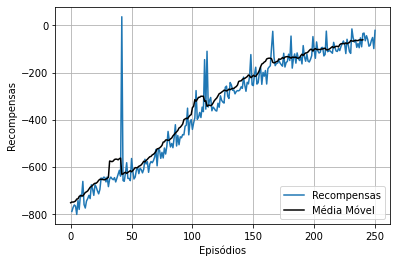

In [6]:
state_size = 8
agent = Agent(state_size) #Criação do agente
ep = 0 #Indica o episódio atual
reward_mean = 0
eps=[]
recomp=[] 
while ep < EPISODES:
    memoria = [] 
    d = [random.uniform(0.5,7) for i in range(maxnrofdevices)] #Mesmas distâncias para cada simulação
    rand = [np.random.rand(1,1) for i in range(maxnrofdevices)] #Mesmas variavel simulador Maarten
    while len(memoria) < simulations:
        sf = [] 
        memoriaSM = []
        devices_in_each_sf = [0]*6
        #Variaveis de controle simulador Maarten
        results = np.zeros((maxnrofdevices,1)) 
        ft = np.zeros((nrofslots, nrofchannels))
        ft2 = np.zeros((nrofslots, nrofchannels))
        colission = np.zeros((maxnrofdevices, nrofpackets))
        pac_ent = 1
        for k in range(maxnrofdevices):
            state = []           
            state.append((d[k] - 0.5)/(7-0.5)) #Distância Normalizada
            state.append(devices_in_each_sf[0]/1000) #SFs alocados
            state.append(devices_in_each_sf[1]/1000)
            state.append(devices_in_each_sf[2]/1000)
            state.append(devices_in_each_sf[3]/1000)
            state.append(devices_in_each_sf[4]/1000)
            state.append(devices_in_each_sf[5]/1000)
            state.append(pac_ent) #Pacotes entregues

            action = agent.act(np.array([state])) #Agente realiza ação

            sf.append(action.index(1))
            devices_in_each_sf[sf[k]]+=1

            d_norm = (d[k] - 0.5)/(7-0.5)
            sf_norm = (sfs[sf[k]] - np.amin(sfs))/(np.amax(sfs)-np.amin(sfs)) 

            ######## Simulador Maarten
            time_offset = math.floor((nrofslots - (packetduration[sf[k]])/timeinterval) * rand[k])

            duration = lora_duration[sf[k], 2]

            for j in range(int(duration/timeinterval)):
                if j+time_offset > nrofslots:
                    continue

                if ft[j+time_offset, sf[k]] == 0:
                    ft[j+time_offset, sf[k]] = 1 
                    ft2[j+time_offset, sf[k]]= k

                else:
                    ft[j+time_offset, sf[k]] += 1
                    colission[k] = 1
                    t = int(ft2[j+time_offset, sf[k]])
                    colission[t] = 1
            results[k] = np.sum(colission)        
            pac_ent = int(1000-results[k])/1000

            ##### Função de recompensa
            score = (1/(abs((d_norm - sf_norm))))*pac_ent
            if devices_in_each_sf[sf[k]] > total_devices_in_each_sf[sf[k]]:
                score += -2000
            
            memoriaSM.append([state, sf[k], score]) #Adicionando passos da simulação

        memoria.append(memoriaSM) #Salvando na memoria cada simulação
    
    rec = [] #Guardar todas as recompensas obtidas nas simulações

    #Selecionando os melhores passos "ELITE" para treinar agente
    for a in range(maxnrofdevices):
        comp = []
        for am in range(len(memoria)):
            comp.append(memoria[am][a])
        comp.sort(key=lambda x: x[2], reverse=True)
        for c in comp:  
            rec.append(c[2])
        elite.append(comp[0])
    reward_mean = np.sum(rec)/(simulations*maxnrofdevices) #Média das recompensas
    #Criando dataFrame com os dados ELITE para treinamento
    dist = []
    sf12 = []
    sf11 = []
    sf10 = []
    sf9 = []
    sf8 = []
    sf7 = []
    pac = []
    acoes = []

    for el in elite:
        dist.append(el[0][0])
        sf12.append(el[0][1])
        sf11.append(el[0][2])
        sf10.append(el[0][3])
        sf9.append(el[0][4])
        sf8.append(el[0][5])
        sf7.append(el[0][6])
        pac.append(el[0][7])
        acoes.append(el[1])
    df = pd.DataFrame({'Distância': dist,
                       'SF12' : sf12,
                       'SF11' : sf11,
                       'SF10' : sf10,
                       'SF9' : sf9,
                       'SF8' : sf8,
                       'SF7' : sf7,
                       'Pacotes Entregues' : pac,
                       'Ação': acoes})
    
    #Separando em classes e rótulos
    x = df.iloc[:, :8].values
    z = df.iloc[:, 8].values
    dummy_y = []
    for w in range(len(z)):
        dummy_y.append(agent.action_space[z[w]])
    dummy_y = np.asarray(dummy_y)

    agent.train(x, dummy_y) #Treinando agente

    print("%d: reward_mean = %.3f ---- Epsilon: %.3f" % (ep, reward_mean, agent.epsilon))
    ep += 1
    eps.append(ep)
    recomp.append(reward_mean)

agent.model.save("IC_IA.h5") #Salvando agente treinado(Escolher diretório)

#Verificando progresso do agente
N=10
m_movel= np.convolve(recomp, np.ones(N)/N, mode='valid')
m_movel = m_movel.tolist()                
plt.plot(eps, recomp,  m_movel, 'black')
plt.grid()
plt.xlabel('Episódios')
plt.ylabel('Recompensas')
plt.legend(['Recompensas' , 'Média Móvel'])

# **TESTES E COMPARAÇÕES** #####Alterar vazao, taxakb, results e ação do agente

In [5]:
model = load_model("IC_IA.h5") #Carregando agente treinado
modelDQN = load_model("DQN.h5")
#Criando variaveis para dataframe de análise
cab = []
cab.append('Distância do device atual')
cab.append('SF 12')
cab.append('SF 11')
cab.append('SF 10')
cab.append('SF 9')
cab.append('SF 8')
cab.append('SF 7')
cab.append('Pacotes entregues')
cab.append('SF escolhido')
dados = []
dados.append(cab)

#Variaveis simulador Maarten
lista_taxa = []
pacote_bs = []
ft = np.zeros((nrofslots, nrofchannels))
ft2 = np.zeros((nrofslots, nrofchannels))
colission = np.zeros((maxnrofdevices, nrofpackets))

#Resultados RL-Cross-Entropy
results = np.zeros((maxnrofdevices,1))
vazao = [] 
taxakb = []
filee = "/content/drive/MyDrive/Data1.csv"

#Resultados DQN
'''results2 = np.zeros((maxnrofdevices,1))
vazao2 = [] 
taxakb2 = []
filee = "/content/drive/MyDrive/Data2.csv"
'''

#Resultados SF-Aleatório
'''results3 = np.zeros((maxnrofdevices,1))
vazao3 = [] 
taxakb3 = [] 
filee = "/content/drive/MyDrive/Data3.csv"
'''

sf = []
d = []
ra = []
devices_in_each_sf = [0]*6
pac_ent = 1
for k in range(maxnrofdevices):
    d.append(random.uniform(0.5,7))     
    d_norm = (d[k] - 0.5)/(7-0.5)

    ####### IA #######
    dad = []
    dad.append(d_norm)
    dad.append(devices_in_each_sf[0]/1000)
    dad.append(devices_in_each_sf[1]/1000)
    dad.append(devices_in_each_sf[2]/1000)
    dad.append(devices_in_each_sf[3]/1000)
    dad.append(devices_in_each_sf[4]/1000)
    dad.append(devices_in_each_sf[5]/1000)
    dad.append(pac_ent)
    l = []
    l.append(dad)
    a_i = model.predict(l)
    sf.append(np.argmax(a_i))

    ###### DQN ########
    '''pak_loss = 32.45 + 10*2*math.log(d[k],10) + 10*2*math.log(868,10)   
    state = []
    state.append(k)           
    state.append(pak_loss)
    state.append(float(results[k-1]))
    state.append(int(k - results[k-1]))
    action = modelDQN.predict(np.array([state]))
    sf.append(np.argmax(action))'''
        
    ###### Aletatório ########    
    #sf.append(random.randint(0,5))
        
    devices_in_each_sf[sf[k]] +=1

    ###### SIMULADOR #######
    ra.append(np.random.rand(1,1))
    time_offset = math.floor((nrofslots - (packetduration[sf[k]])/timeinterval) * ra[k])

    duration = lora_duration[sf[k], 2]

    for j in range(int(duration/timeinterval)):
        if j+time_offset > nrofslots:
            continue

        if ft[j+time_offset, sf[k]] == 0:
            ft[j+time_offset, sf[k]] = 1 
            ft2[j+time_offset, sf[k]]= k

        else:
            ft[j+time_offset, sf[k]] += 1
            colission[k] = 1
            t = int(ft2[j+time_offset, sf[k]])
            colission[t] = 1

    results[k] = np.sum(colission)
    pac_ent = int(1000-results[k])/1000

    taxan = taxa[sf[k]]/1000
    lista_taxa.append(taxan) 
    pacote_bs.append(k - np.sum(colission)) 

    tempos = packetduration[sf[k]] #Tempo para enviar um pacote 
    taxamed = np.mean(lista_taxa)

    #Registrando resultados RL-Cross-Entropy
    results[k] = np.sum(colission)                             
    vazao.append(pacote_bs[-1]/tempos)
    taxakb.append(taxamed)

    #Registrando resultados DQN
    '''results2[k] = np.sum(colission)                             
    vazao2.append(pacote_bs[-1]/tempos)
    taxakb2.append(taxamed)'''

    #Registrando resultados SF-ALEATÓRIO
    '''results3[k] = np.sum(colission)                             
    vazao3.append(pacote_bs[-1]/tempos)
    taxakb3.append(taxamed)'''

    #Guardando ações tomadas pelo agente
    dadosN = []
    dadosN.append(d[k])
    dadosN.append(devices_in_each_sf[0])
    dadosN.append(devices_in_each_sf[1])
    dadosN.append(devices_in_each_sf[2])
    dadosN.append(devices_in_each_sf[3])
    dadosN.append(devices_in_each_sf[4])
    dadosN.append(devices_in_each_sf[5])
    dadosN.append(pac_ent*1000)
    if sf[k] == 5:
        dadosN.append(7)
    elif sf[k] == 4:
        dadosN.append(8)
    elif sf[k] == 3:
        dadosN.append(9)
    elif sf[k] == 2:
        dadosN.append(10)
    elif sf[k] == 1:
        dadosN.append(11)
    elif sf[k] == 0:
        dadosN.append(12)
    dados.append(dadosN)

with open(filee, 'w', newline='') as arq:
    wr = csv.writer(arq)

    for dado in dados:
        wr.writerow(dado)


tabela = pd.read_csv(filee)
display(tabela)

,Distância do device atual,SF 12,SF 11,SF 10,SF 9,SF 8,SF 7,Pacotes entregues,SF escolhido
0,5.110591,0,0,1,0,0,0,1000.0,10
1,6.804491,0,1,1,0,0,0,1000.0,11
2,5.410965,0,2,1,0,0,0,1000.0,11
3,6.688554,0,3,1,0,0,0,1000.0,11
4,5.555729,0,4,1,0,0,0,1000.0,11
...,...,...,...,...,...,...,...,...,...
995,6.134531,0,41,69,149,271,466,623.0,7
996,4.178454,0,41,69,149,271,467,623.0,7
997,5.725577,0,41,69,149,271,468,623.0,7
998,6.382633,0,41,69,149,271,469,623.0,7


In [ ]:
#COLISÕES
plt.plot(nrofdevices, results[:], nrofdevices, results2[:], nrofdevices, results3[:]) 
plt.title("Comparativo")
plt.xlabel("Número de Dispositivos")
plt.ylabel("Colisões")
plt.legend(["Cross-Entropy-RL", "DQN", "Aleatorio"])
plt.grid() 
plt.show()

In [ ]:
#TAXA
plt.plot(nrofdevices, taxakb, nrofdevices, taxakb2, nrofdevices, taxakb3)
plt.title("Comparativo")
plt.xlabel("Número de Dispositivos")
plt.ylabel("Taxa de Transferência Média (kbps)")
plt.legend(["Cross-Entropy-RL", "DQN", "Aleatorio"])
plt.grid() 
plt.show()

In [ ]:
#VAZÃO
plt.plot(nrofdevices, vazao, nrofdevices, vazao2, nrofdevices, vazao3)
plt.title("Comparativo")
plt.xlabel("Número de Dispositivos")
plt.ylabel("Vazão (pacotes/ms)")
plt.legend(["Cross-Entropy-RL", "DQN", "Aleatorio"])
plt.grid() 
plt.show()